# Importaciones

In [1]:
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)

In [2]:
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt


from tensorflow.keras.layers import Input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

2025-03-06 09:20:19.584412: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-06 09:20:19.588712: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-06 09:20:19.605351: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1741249219.634063   15462 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1741249219.642517   15462 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-06 09:20:19.670663: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

# Carga del modelo y sus métricas

In [3]:
# 1️⃣ Cargar el modelo
modelo = tf.keras.models.load_model("./results/binary/models/best_binary_model.h5")

# 2️⃣ Leer el CSV con las rutas de imágenes
csv_path = "./results/csv_files/registro_imagenes_reales_binary.csv"
df = pd.read_csv(csv_path)

2025-03-06 09:20:22.696061: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [4]:
modelo.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 222, 222, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 222, 222, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 96)   │        27,744 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 109, 109, 96)   │           384 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 109, 109, 96)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 54, 54, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │       110,720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 52, 52, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 52, 52, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 192)            │    16,613,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 192)            │           768 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 192)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 192)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           386 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,755,108 (63.92 MB)

 Trainable params: 16,754,210 (63.91 MB)

 Non-trainable params: 896 (3.50 KB)

 Optimizer params: 2 (12.00 B)

# Mapa de características

In [5]:
# Definir el input explícito
input_layer = Input(shape=(1, 224, 224, 3))

In [6]:
print([layer.name for layer in modelo.layers])

['conv2d', 'batch_normalization', 'activation', 'max_pooling2d', 'dropout', 'conv2d_1', 'batch_normalization_1', 'activation_1', 'max_pooling2d_1', 'dropout_1', 'conv2d_2', 'batch_normalization_2', 'activation_2', 'max_pooling2d_2', 'dropout_2', 'flatten', 'dense', 'batch_normalization_3', 'activation_3', 'dropout_3', 'dense_1']


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step


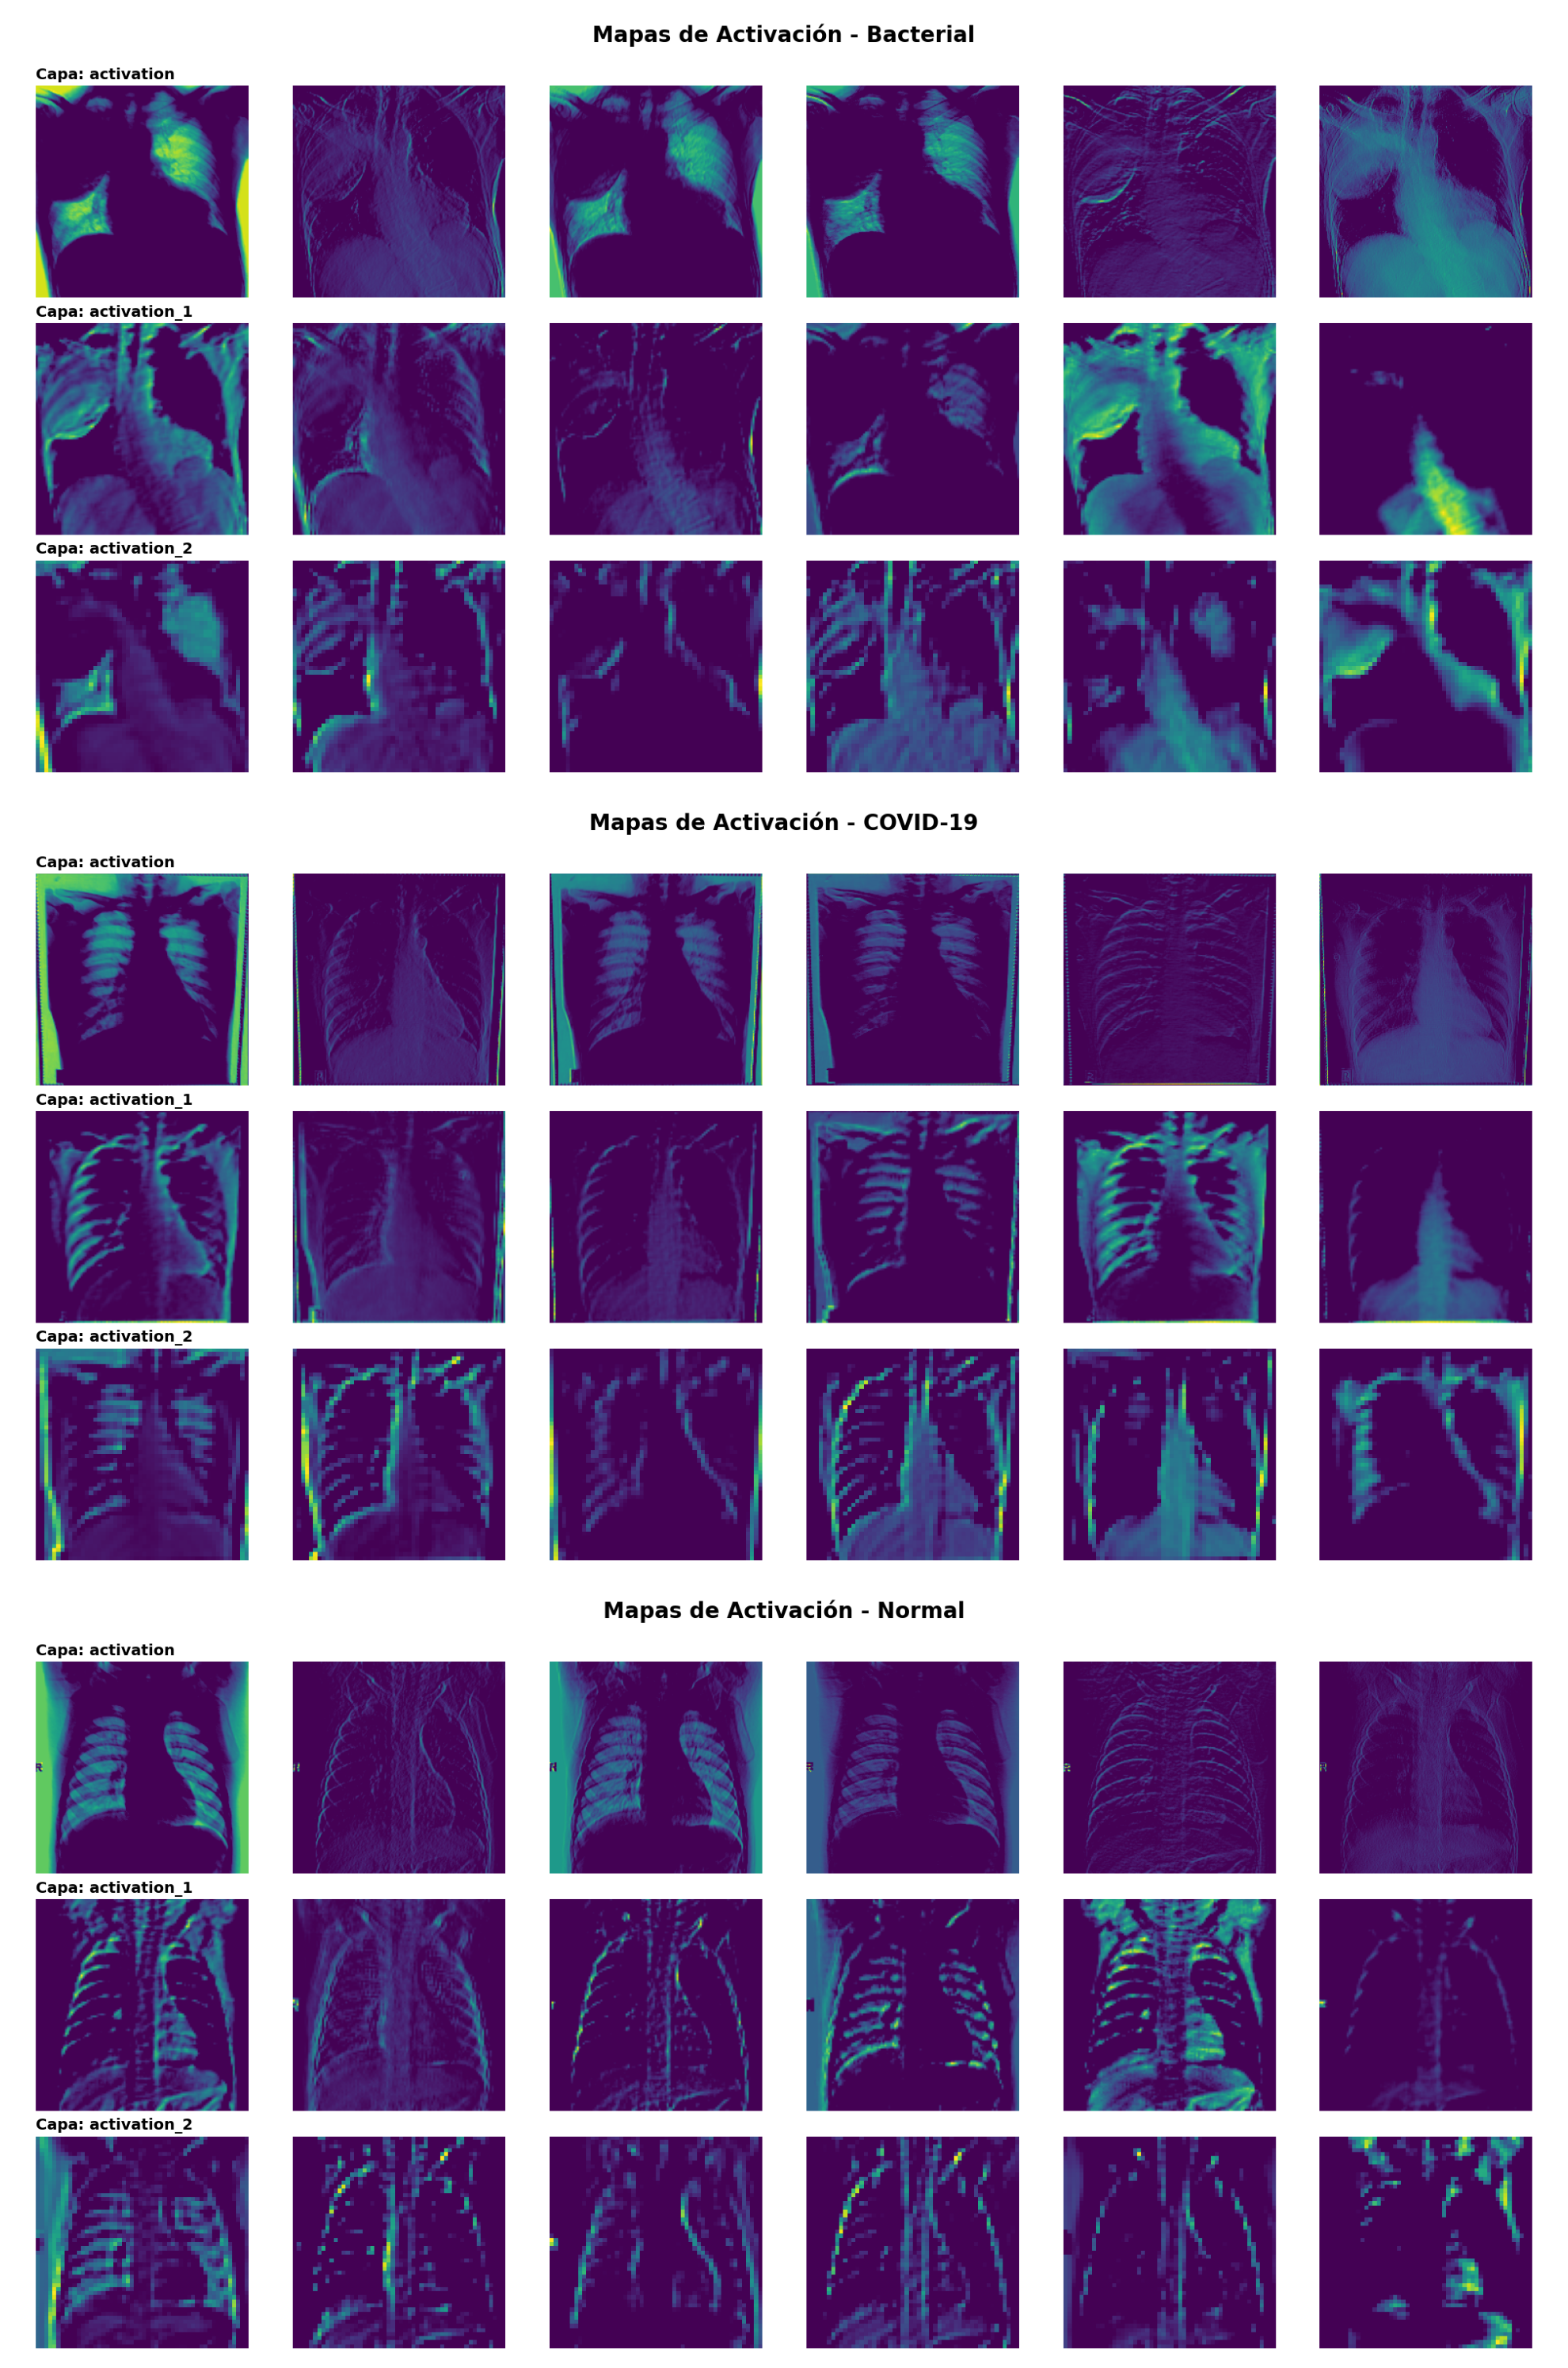

In [7]:
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas

# Definir rutas de las imágenes
img_paths = {
    "Bacterial": "./data/covid-chest-xray/Bacterial/Bacterial-1.jpg",
    "COVID-19": "./data/covid-chest-xray/COVID-19/COVID-19-25.jpg",
    "Normal": "./data/covid-chest-xray/Normal/Normal-1.jpeg"
}

# Definir las capas de interés
conv_layers = ['activation', 'activation_1', 'activation_2']

# Lista para almacenar imágenes de figuras
fig_images = []

# Procesar cada imagen sin mostrarla
for label, img_path in img_paths.items():
    img = load_img(img_path, target_size=(224, 224), color_mode='rgb')
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Crear figura sin mostrarla
    fig, axes = plt.subplots(len(conv_layers), 6, figsize=(20, 10))
    fig.suptitle(f"Mapas de Activación - {label}", fontsize=20, fontweight="bold")

    # Iterar sobre cada capa de convolución
    for row, layer_name in enumerate(conv_layers):
        layer_index = [i for i, layer in enumerate(modelo.layers) if layer.name == layer_name][0]
        intermediate_model = tf.keras.Sequential(modelo.layers[:layer_index + 1])

        # Obtener la salida de la imagen en esa capa
        feature_maps = intermediate_model.predict(img_array)

        # Visualizar activaciones de algunos filtros (máx 6)
        num_filters = feature_maps.shape[-1]
        for col in range(min(num_filters, 6)):
            axes[row, col].imshow(feature_maps[0, :, :, col], cmap='viridis')
            axes[row, col].axis("off")

            if col == 0:
                axes[row, col].set_title(f"Capa: {layer_name}", fontsize=14, fontweight="bold", loc="left")

    plt.tight_layout()
    plt.subplots_adjust(top=0.9)

    # Convertir la figura en una imagen sin mostrarla
    canvas = FigureCanvas(fig)
    canvas.draw()
    img_array = np.array(canvas.buffer_rgba())  # Convertir en imagen
    fig_images.append(img_array)  # Guardar imagen
    plt.close(fig)  # Cerrar la figura para no mostrarla

# Crear una nueva figura final con todas las imágenes
final_fig, final_axes = plt.subplots(len(fig_images), 1, figsize=(20, 10 * len(fig_images)))

# Si solo hay una figura, convertir axes en lista para evitar errores
if len(fig_images) == 1:
    final_axes = [final_axes]

# Insertar cada imagen en la figura final
for ax, img in zip(final_axes, fig_images):
    ax.imshow(img)
    ax.axis("off")

plt.tight_layout()
plt.show()

# Análisis del modelo

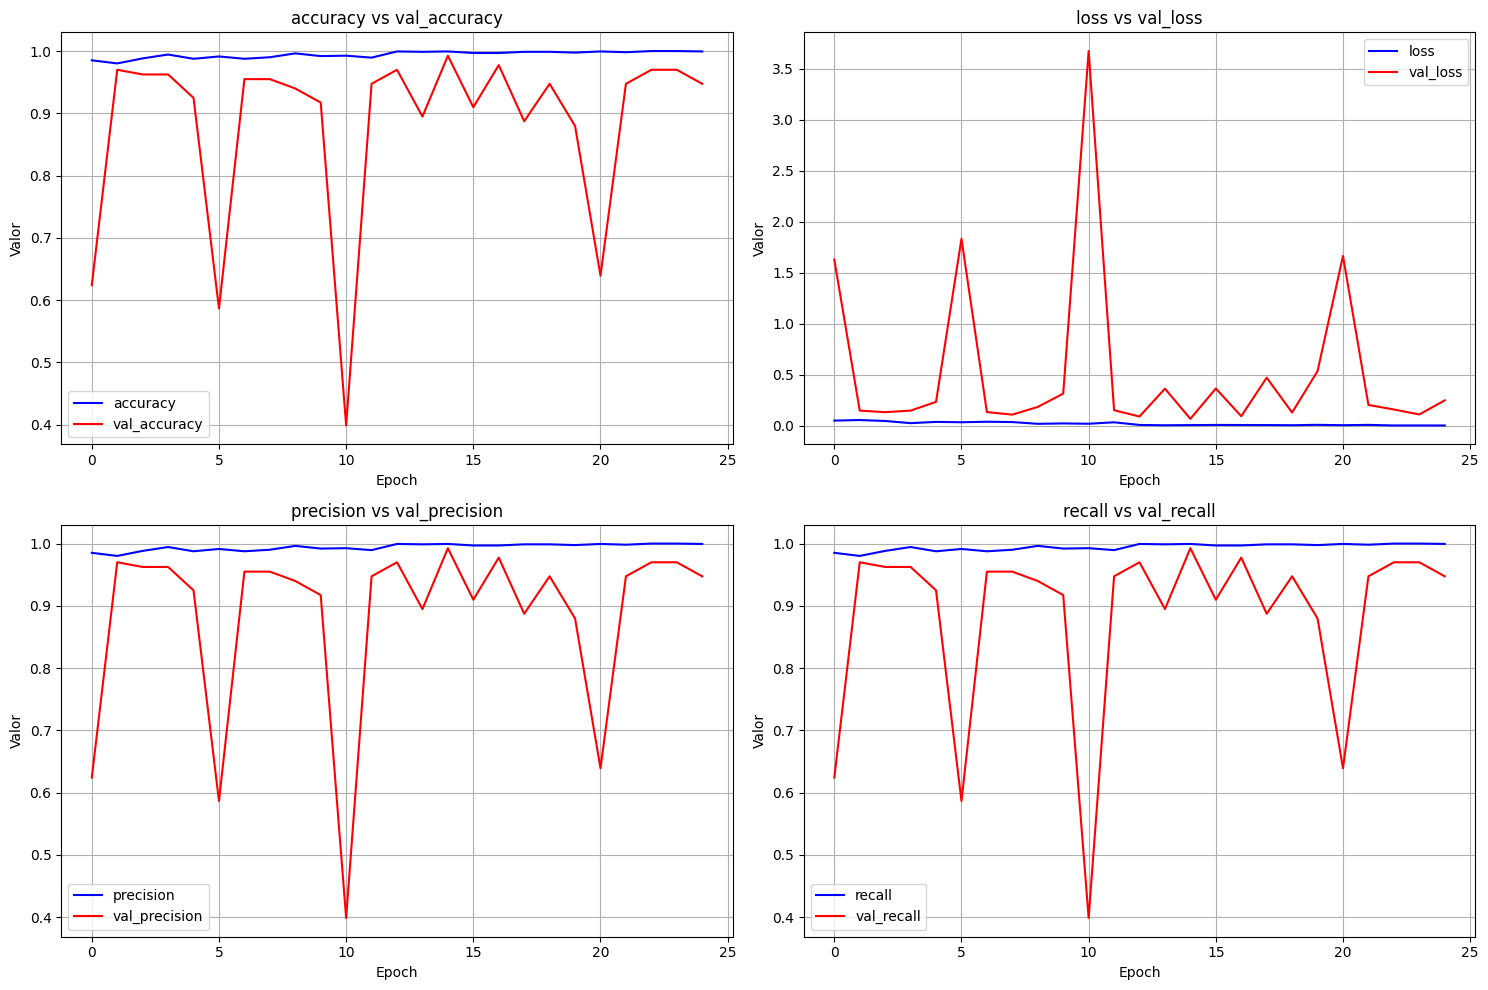

In [8]:
# Cargar los datos
df_metrics = pd.read_csv("./results/csv_files/training_metrics_binary.csv")

# Identificar las métricas y sus versiones de validación
base_metrics = [col for col in df_metrics.columns if not col.startswith("val_")]
base_metrics.remove('AUC')

# Definir la disposición de las subgráficas (3 en la primera fila, 2 en la segunda)
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

# Graficar cada métrica junto con su versión de validación en una sola figura
for i, metric in enumerate(base_metrics):
    ax = axes[i]
    ax.plot(df_metrics.index, df_metrics[metric], label=metric, color='b')
    val_metric = f"val_{metric}"
    if val_metric in df_metrics.columns:
        ax.plot(df_metrics.index, df_metrics[val_metric], label=val_metric, color='r')
    ax.set_xlabel("Epoch")
    ax.set_ylabel("Valor")
    ax.set_title(f"{metric} vs {val_metric}")
    ax.legend()
    ax.grid()

plt.tight_layout()
plt.show()

In [9]:
# Filtrar solo las imágenes del conjunto de validación
df_val = df[df["Conjunto"] == "val"]

# Obtener rutas y etiquetas reales
image_paths = df_val["Ruta"].tolist()
y_true = df_val["Clase"].tolist()  # Asegúrate de que la columna tenga el nombre correcto

# # Obtener nombres de clases únicas (importante para el reporte y la matriz)
class_names = sorted(df_val["Clase"].unique())  # Ordenamos para que coincidan con índices
class_indices = {class_name: i for i, class_name in enumerate(class_names)}
y_true_indices = [class_indices[label] for label in y_true]  # Convertimos etiquetas a índices

# 3️⃣ Cargar y preprocesar las imágenes
def load_and_preprocess_image(img_path, target_size=(224, 224)):
    img = cv2.imread(img_path)  # Cargar la imagen
    if img is None:
        print(f"Error: No se pudo cargar la imagen en la ruta: {img_path}")
        return None  # O puedes lanzar una excepción
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convertir BGR a RGB
    img = cv2.resize(img, target_size)  # Redimensionar
    img = img / 255.0  # Normalizar a [0, 1]
    return img

# Cargar todas las imágenes
X_val = np.array([load_and_preprocess_image(img.replace('\\', '/')) for img in image_paths])

5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step
AUC-ROC: 0.9849
Sensibilidad para 85% de especificidad: 0.9241


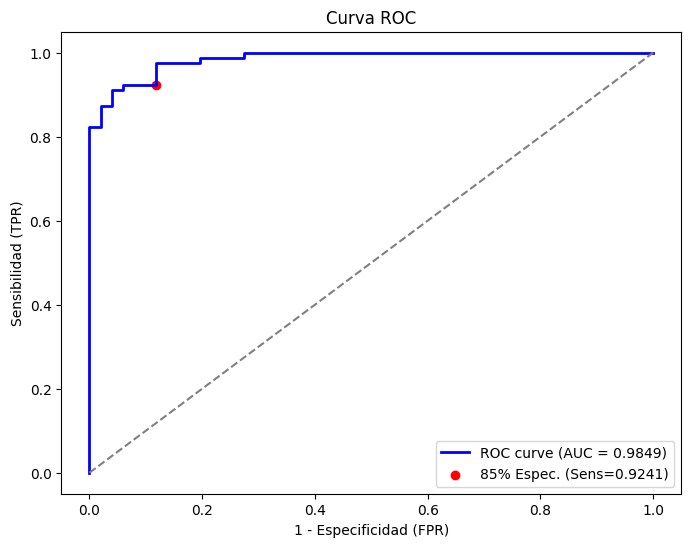

In [10]:
# Obtener las probabilidades de la clase COVID-19 (clase positiva)
y_scores = modelo.predict(X_val)[:, 1]  # Asegúrate de que la segunda columna sea COVID-19

# Calcular la curva ROC y el AUC
fpr, tpr, thresholds = roc_curve(y_true_indices, y_scores)
roc_auc = auc(fpr, tpr)

print(f"AUC-ROC: {roc_auc:.4f}")

# 7️⃣ Encontrar la sensibilidad para 85% de especificidad
especificidad = 1 - fpr
idx = np.argmin(np.abs(especificidad - 0.85))  # Índice más cercano al 85%
sensibilidad_85esp = tpr[idx]
print(f"Sensibilidad para 85% de especificidad: {sensibilidad_85esp:.4f}")

# 8️⃣ Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="blue", lw=2, label=f"ROC curve (AUC = {roc_auc:.4f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")  # Línea diagonal
plt.scatter(fpr[idx], tpr[idx], color="red", label=f"85% Espec. (Sens={sensibilidad_85esp:.4f})")
plt.xlabel("1 - Especificidad (FPR)")
plt.ylabel("Sensibilidad (TPR)")
plt.title("Curva ROC")
plt.legend(loc="lower right")
plt.show()

5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step


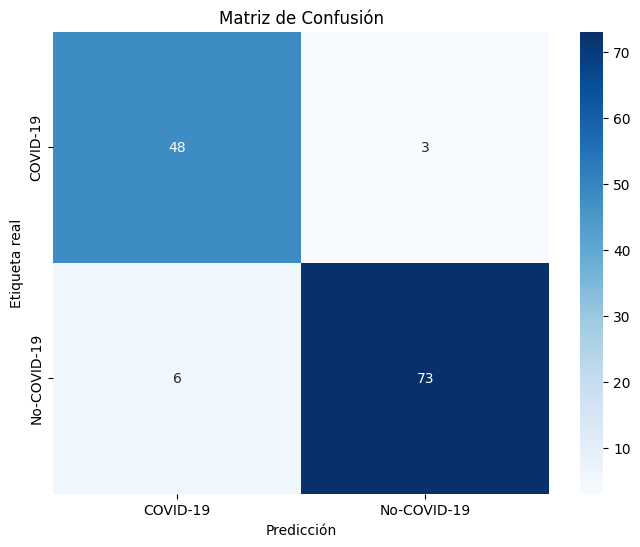

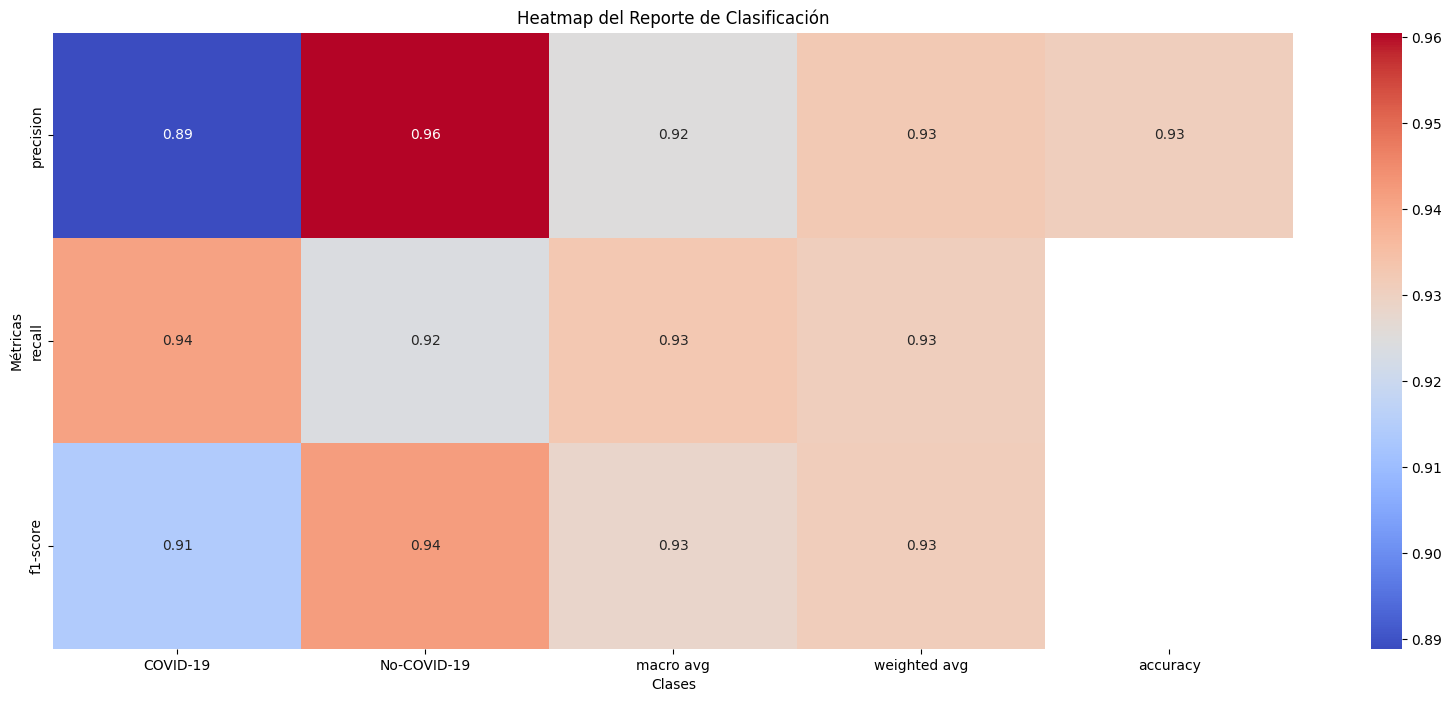

In [11]:
# 4️⃣ Hacer predicciones
y_pred_probs = modelo.predict(X_val)  # Obtiene probabilidades
y_pred_indices = np.argmax(y_pred_probs, axis=1)  # Índices de las clases predichas

# 5️⃣ Matriz de Confusión
cm = confusion_matrix(y_true_indices, y_pred_indices)

# 6️⃣ Visualización de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicción")
plt.ylabel("Etiqueta real")
plt.title("Matriz de Confusión")
plt.show()

# 7️⃣ Imprimir informe de clasificación
report = classification_report(y_true_indices, y_pred_indices, target_names=class_names, output_dict=True)

# Extraer solo precision, recall y f1-score (sin support)
metrics = ["precision", "recall", "f1-score"]

# Incluir clases + "macro avg" + "weighted avg"
valid_labels = class_names + ["macro avg", "weighted avg"]

# Crear la matriz con métricas para las clases + promedios
report_matrix = np.array([[report[label][metric] for metric in metrics] for label in valid_labels], dtype=float)

# Extraer accuracy (valor único)
accuracy_value = report["accuracy"]

# Agregar accuracy como una fila adicional (usando np.nan en recall y f1-score)
accuracy_row = np.array([accuracy_value, np.nan, np.nan], dtype=float)
report_matrix = np.vstack([report_matrix, accuracy_row])

# Etiquetas de filas actualizadas (incluyendo "accuracy")
final_labels = valid_labels + ["accuracy"]

# 🚀 TRASPONER LA MATRIZ PARA QUE LAS MÉTRICAS SEAN FILAS Y LAS CLASES COLUMNAS
report_matrix = report_matrix.T

# 🚀 Ajustar el tamaño para que sea más alargada
plt.figure(figsize=(20, 8))  # Aumentar la altura

# Crear heatmap con la matriz traspuesta
sns.heatmap(report_matrix, annot=True, fmt=".2f", cmap="coolwarm", xticklabels=final_labels, yticklabels=metrics)

plt.title("Heatmap del Reporte de Clasificación")
plt.xlabel("Clases")
plt.ylabel("Métricas")
plt.show()